# SVD и PCA на изображении

In [1]:
import numpy as np

from matplotlib import image
from matplotlib import pyplot as plt

import cv2

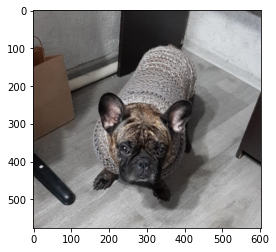

In [2]:
img = image.imread("photo.jpg")

plt.imshow(img)
plt.show()

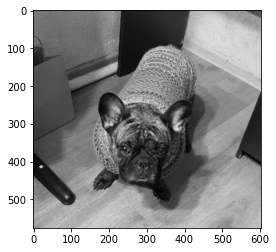

In [3]:
img = image.imread("photo.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_img, cmap='gray')
plt.show()

In [4]:
gray_img.shape

(576, 603)

In [5]:
U, lmbd, V = np.linalg.svd(gray_img)

In [6]:
U.shape, lmbd.shape, V.shape

((576, 576), (576,), (603, 603))

In [7]:
S = np.zeros((U.shape[1], V.shape[0]))

for i in range(U.shape[1]):
    S[i, i] = lmbd[i]

Вернем как было, убедимся что ничего не изменилось

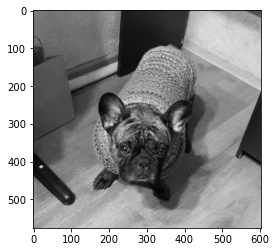

In [8]:
US = np.dot(U, S)
USV = np.dot(US, V)

plt.imshow(USV, cmap='gray')
plt.show()

In [9]:
U_crop = U[:, :100]
S_crop = S[:100, :100]
V_crop = V[:100, :]
U_crop.shape, S_crop.shape, V_crop.shape

((576, 100), (100, 100), (100, 603))

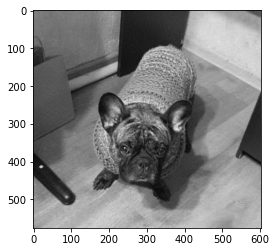

In [10]:
US = np.dot(U_crop, S_crop)
USV = np.dot(US, V_crop)

plt.imshow(USV, cmap='gray')
plt.show()

На первый взгляд ничего не потеряли в качетсве, хотя достаточно много памяти сэкономлено.

Оставим первые 50 компонент

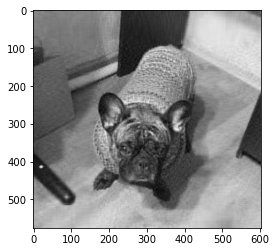

In [11]:
d = 50
U_crop = U[:, :d]
S_crop = S[:d, :d]
V_crop = V[:d, :]
U_crop.shape, S_crop.shape, V_crop.shape

US = np.dot(U_crop, S_crop)
USV = np.dot(US, V_crop)

plt.imshow(USV, cmap='gray')
plt.show()

In [12]:
Mem = U.shape[0] * U.shape[1] + S.shape[0] * S.shape[1] + V.shape[0] * V.shape[1]
Mem_crop = U_crop.shape[0] * U_crop.shape[1] + S_crop.shape[0] * S_crop.shape[1] + V_crop.shape[0] * V_crop.shape[1]
Mem / Mem_crop

16.96847843775427

Качество немного ухудшилось. Но память сэкономлена почти в 17 раз!

Оставим первые 10 компонент.

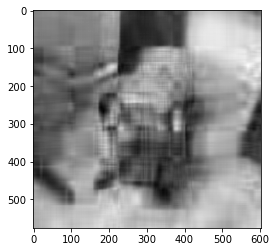

In [13]:
d = 10
U_crop = U[:, :d]
S_crop = S[:d, :d]
V_crop = V[:d, :]
U_crop.shape, S_crop.shape, V_crop.shape

US = np.dot(U_crop, S_crop)
USV = np.dot(US, V_crop)

plt.imshow(USV, cmap='gray')
plt.show()

Сингулярные числа в матрице S расположены по убыванию: чем ближе к началу, тем компоненты важнее и значимее влияют на качесво. 

Уберем первые 10 компонент.

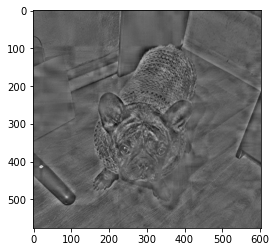

In [14]:
d = 10
U_crop = U[:, d:]
S_crop = S[d:, d:]
V_crop = V[d:, :]
U_crop.shape, S_crop.shape, V_crop.shape

US = np.dot(U_crop, S_crop)
USV = np.dot(US, V_crop)

plt.imshow(USV, cmap='gray')
plt.show()

Убрав всего 10 первых компонент, сильно теряется качетсво фотографии